# Porto Seguro Safe Driver - Supervised Learning

## Data Import and EDA

### Import the Data

Import all libraries needed for the project, and import the data into a dataframe. 

In [1]:
# Importing needed libraries 
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

# For scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Deal with imbalanced dataset 
import imblearn


# Import the dataset
dataset = pd.read_csv('data/train.csv', index_col='id')
# Create dataframe
df = pd.DataFrame(dataset)
# Check dataset
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


### Data Overview

Get an overview of the number and types of values in the dataset and create a features summary.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

In [3]:
summary = pd.DataFrame(df.dtypes, columns=['data types'])
# Calculate the number of missing values
summary['# missing values'] = (df == -1).sum().values 
# Number of unique values by features
summary['# unique values'] = df.nunique().values # -> eg. target as 2 unique values as it is 

# Get the type of data in each column
variable_types = []
for col in df.columns: 
    if 'bin' in col or col == 'target':
        variable_types.append('binary')
    elif 'cat' in col: 
        variable_types.append('nominal') # means categorical without any ranking
    elif df[col].dtype == float: 
        variable_types.append('continuous')
    elif df[col].dtype == np.int64:
        variable_types.append('categorical')
summary['variable type'] = variable_types

# View the top of this dataframe
summary.head()

,data types,# missing values,# unique values,variable type
target,int64,0,2,binary
ps_ind_01,int64,0,8,categorical
ps_ind_02_cat,int64,216,5,nominal
ps_ind_03,int64,0,12,categorical
ps_ind_04_cat,int64,83,3,nominal


In [4]:
# Get the names of the columns of a certain variable type 
summary[summary['variable type'] == 'nominal'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

### Value Distributions Visualisation

#### Target Value

Check how balanced (or not) the target value is among the training data.

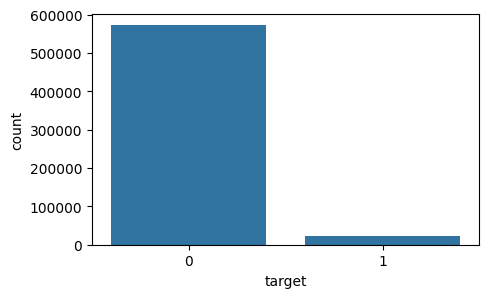

In [5]:
plt.figure(figsize=(5, 3)) # Create a figure

ax = sns.countplot(df, x='target') # countplot: Show the counts of observations in each categorical bin using bars.

#### Feature Distribution

How is each feature distributed looking at the target values? 

In [6]:
def plot_target_ratio_by_feat(datatype='binary', legend='on'): 
    cols = summary[summary['variable type'] == datatype].index
    ncols = 4
    nrows = len(cols) // ncols if len(cols) % ncols == 0 else len(cols) // ncols + 1
    # Create grid of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
    axes = axes.flatten() # Flatten the axes array for easy iteration
    
    for i, feature in enumerate(df[cols]):
        sns.countplot(df, x='target', hue=feature, ax=axes[i])
        # turn off legend if set
        if legend == 'off':
            axes[i].legend().set_visible(False)
        # set the title for each subplot
        axes[i].set_title(f'Countplot for {col}')
    
    plt.tight_layout()

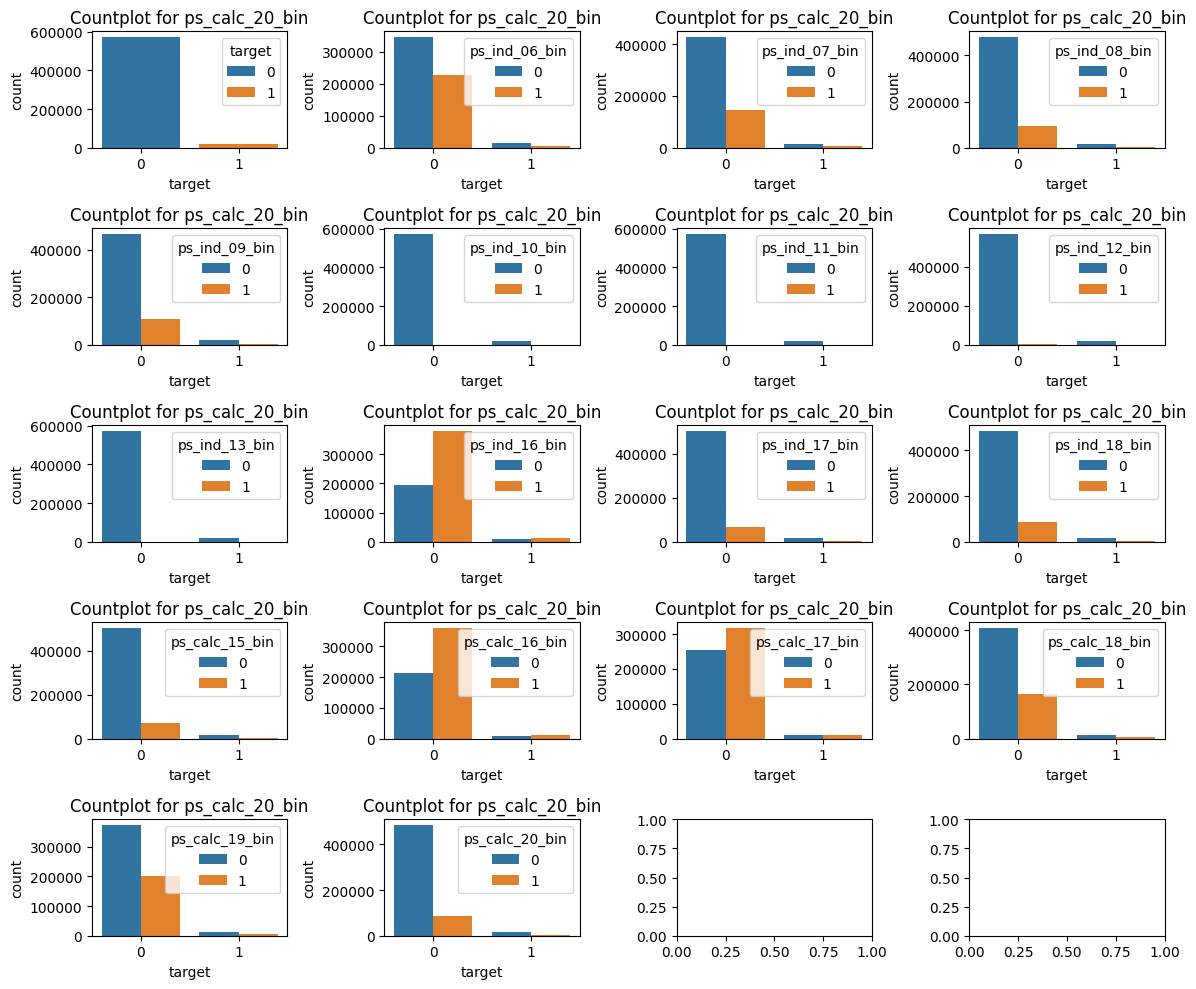

In [7]:
plot_target_ratio_by_feat(datatype='binary')

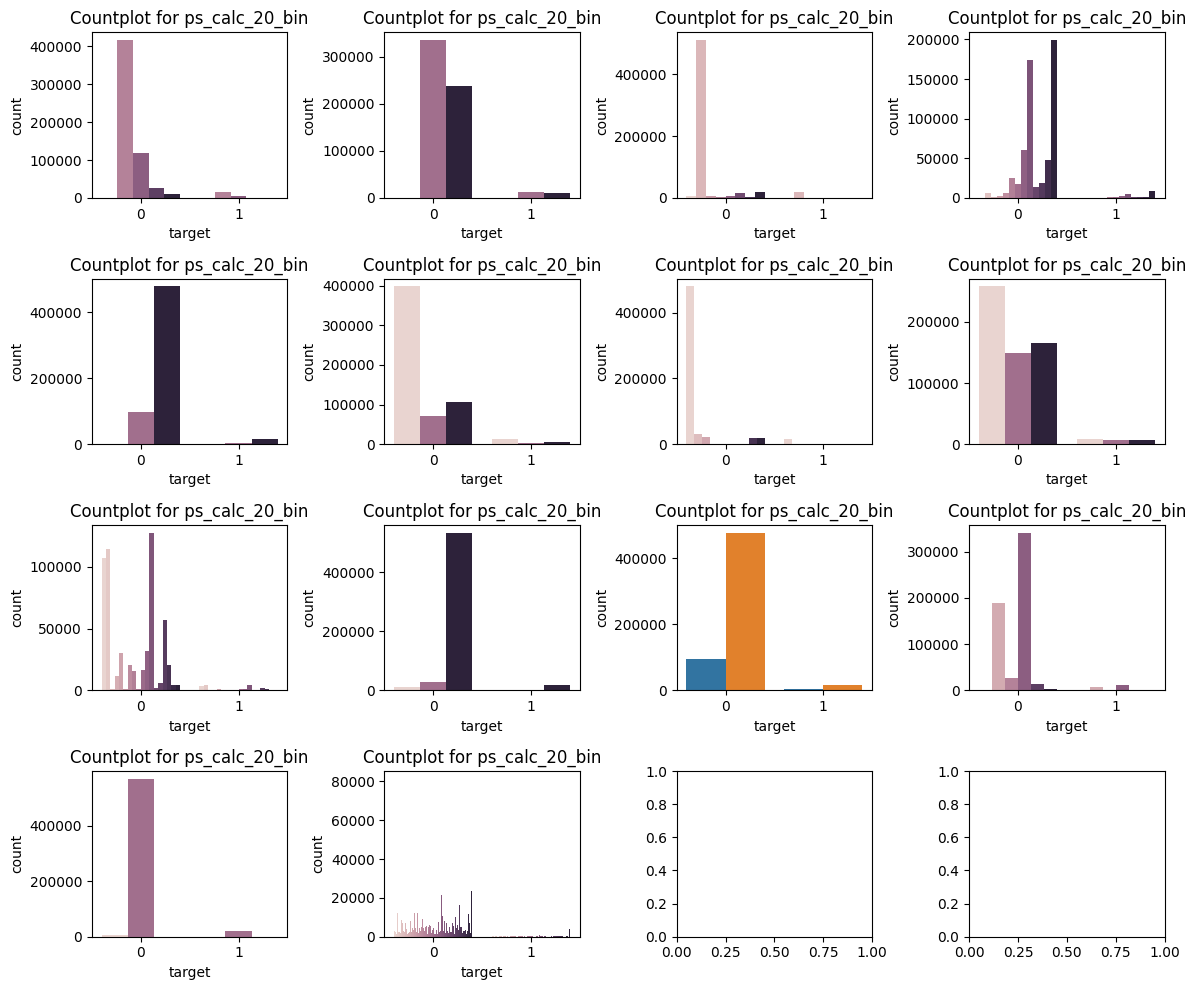

In [8]:
plot_target_ratio_by_feat(datatype='nominal', legend='off')

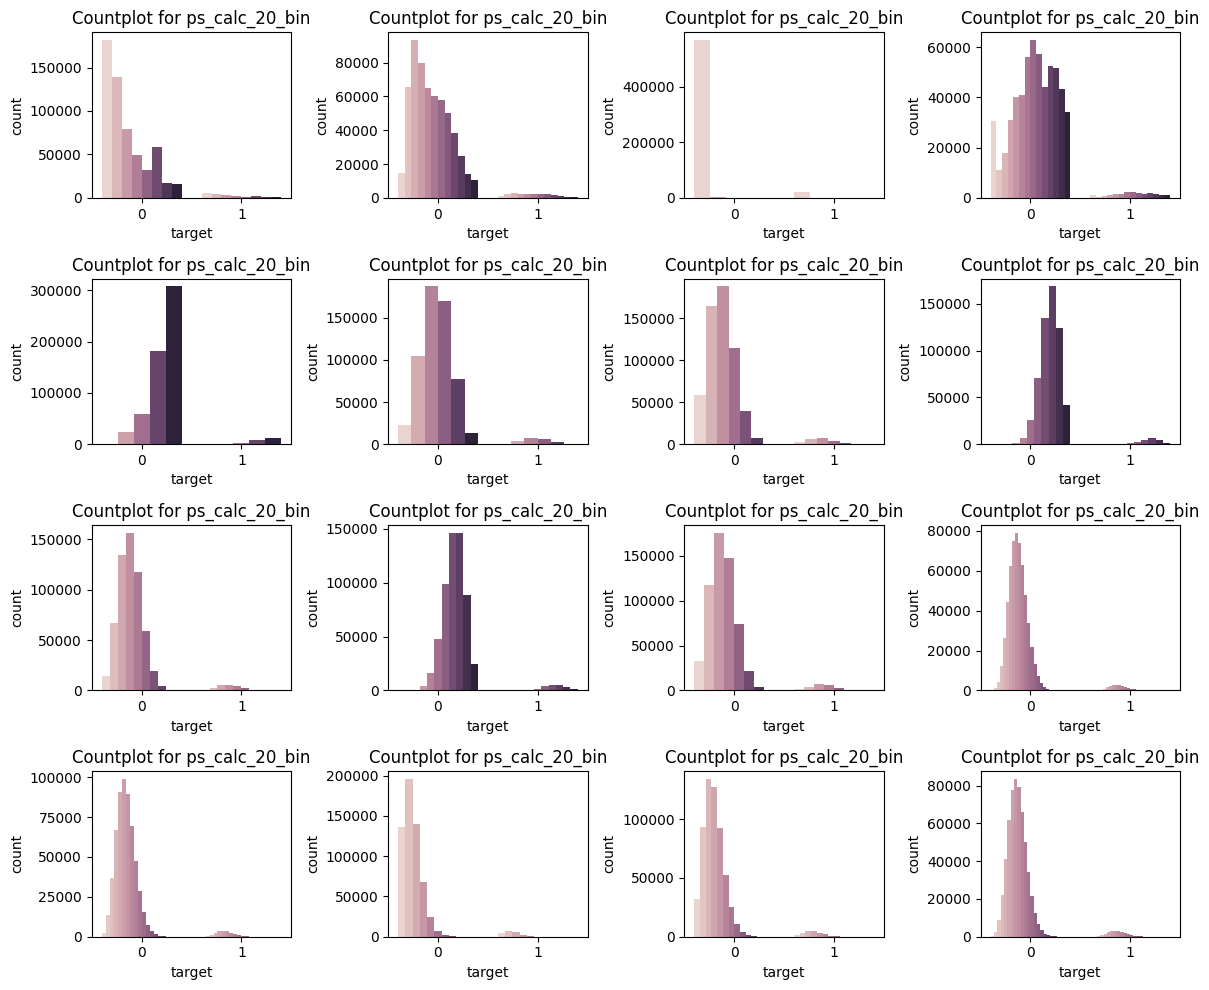

In [9]:
plot_target_ratio_by_feat(datatype='categorical', legend='off')

### Remove Missing Values 

Remove the missing values 

In [10]:
# 1. Remove missing values: All our missing data is marked with -1, so remove every row that has a -1 in it: 
df.replace(-1, np.NaN, inplace=True) # replace the -1 values with NaN, since they indicate missing data
df.dropna(inplace=True)

### Correlation Matrix

Check the correlation among continuous features. 

<Axes: >

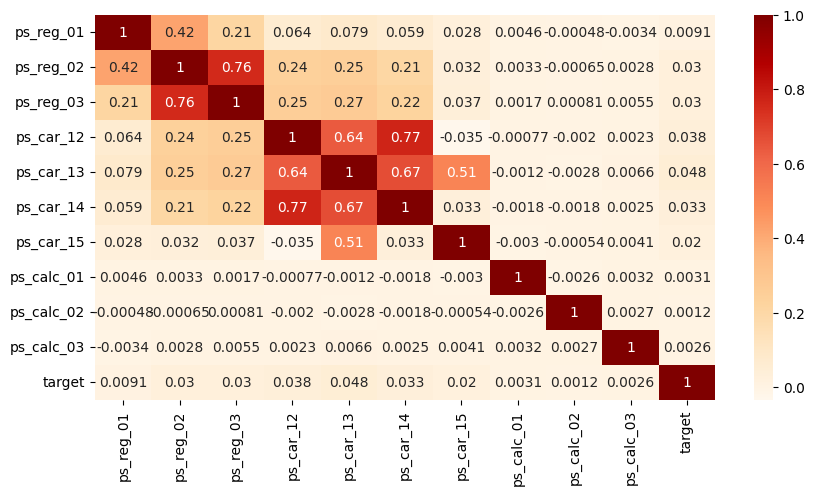

In [11]:
# Find correlating features: 
plt.figure(figsize=(10, 5))
c = df[summary[summary['variable type'] == 'continuous'].index.append(summary[summary.index == 'target'].index)].corr() # Compute pairwise correlation of columns
sns.heatmap(c, annot=True, cmap='OrRd')

#### Near Miss Undersampling

Near Miss is an undersampling method based on the distance of the majority class examples to the minority class examples. The default number of neighbours in NearMiss is 3. 

1. `NearMiss-1` selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class. 
2. `NearMiss-2` selects the positive samples for which the average distance to the N farthest samples of the negative class is the smallest. 

In [12]:
from imblearn.under_sampling import NearMiss
# Define undersampling method 
undersample = NearMiss(version=2)
# Resample 
X, y = undersample.fit_resample(df.iloc[:, 1:], df.iloc[:, :1])

### Split into Train and Testing Sets

In [13]:
# 2. Split into train and testing data 
# X = df.iloc[:, 2:] # dropping the id and target columns
# y = df["target"] # just the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape


(9072, 57)

### Removing Outliers

Removes all outliers from `X_train` and `y_train`. 

In [14]:
# 3. Remove outliers: It depends on what you exactly need for your use-case, but if you remove outliers after standardizing, the resulting data won't be standardized anymore (if many outliers are removed, standard deviation could become considerably smaller than 1)
# identify outliers in the training dataset
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X_train) # Label is 1 for an inlier and -1 for an outlier
# select all rows that are not outliers
inlier_indexes = y_pred == 1

# Remove from X_train and y_train
X_train, y_train = X_train[inlier_indexes], y_train[inlier_indexes]
X_train.shape

(8164, 57)

### Scaling the Data

This method should work for both supervised and unsupervised learning. It either takes in only one argument (eg. X), or it takes X_train and X_test. 

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale_data(X_train, X_test=None, scaling_type='sta'):
    """
    This function scales the input data using either MinMax scaling or Standard scaling.

    Parameters:
    - X_train: The training data.
    - X_test: The testing data (optional).
    - scaling_type: The type of scaler to use, either 'mm' for MinMax Scaling or 'sta' for Standard Scaling.

    Returns:
    - Scaled X_train and X_test (if provided).

    Example:
    >>> X_train_scaled, X_test_scaled = scale_data(X_train, X_test, scaling_type='mm')
    """

    if scaling_type == 'mm':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        if X_test is not None:
            X_test_scaled = scaler.transform(X_test)
    elif scaling_type == 'sta':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        if X_test is not None:
            X_test_scaled = scaler.transform(X_test)
    else:
        return "No correct scaling method."

    if X_test is not None:
        print("Scaled data, size of X_train:", X_train_scaled.shape, "size of X_test:", X_test_scaled.shape)
        return X_train_scaled, X_test_scaled
    else:
        print("Scaled data, size of X:", X_train_scaled.shape)
        return X_train_scaled

In [16]:
# Unsupervised learning 
X = scale_data(np.concatenate([X_train, X_test], axis=0))
X.shape

Scaled data, size of X: (10432, 57)


(10432, 57)

# Model Selection

## K-means
K-means helps find natural groups in data, but it doesn't use yes-no labels directly. It's useful for discovering patterns, even in binary-labeled data, offering insights beyond simple classification.

In [17]:
# import the library
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

### Elbow method 

The elbow method helps find the optimal number of clusters in K-means 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

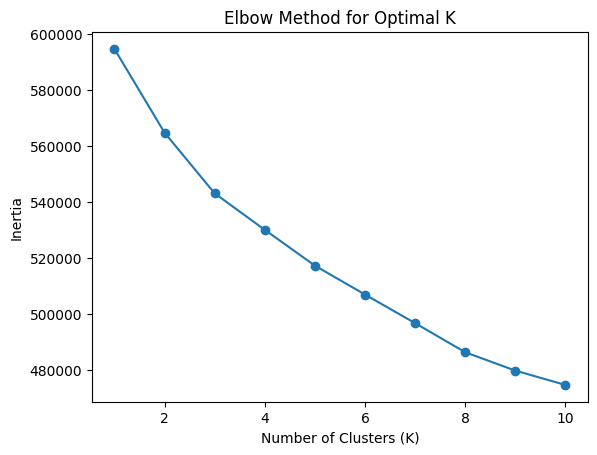

Optimal number of clusters (K): 3


In [18]:
# Initialize a range of cluster numbers to try
num_clusters_range = range(1, 11)
inertia_values = []

# Fit KMeans for each cluster number and store the inertia
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to find the elbow
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Find the optimal K based on the elbow analysis
diff = np.diff(inertia_values)
diff_r = diff[1:] / diff[:-1]
optimal_k = num_clusters_range[np.argmin(diff_r) + 1]

# Print the optimal K
print(f'Optimal number of clusters (K): {optimal_k}')

### Apply with K-means

In [19]:

# optimal_k = 2  

# Fit KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=1)
cluster_labels_optimal = kmeans_optimal.fit_predict(X)

# Add the cluster labels to the existing dataframe
df['Cluster'] = pd.Series(cluster_labels_optimal)

# Visualize the clustered data in 2D using PCA with plotly
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a new dataframe for visualization
df_visualize = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_visualize['Cluster'] = cluster_labels_optimal.astype(str)

# Visualize the clustered data using plotly
fig = px.scatter(df_visualize, x='PC1', y='PC2', color='Cluster', title=f'K-means Clustering (K={optimal_k}) with Plotly')
fig.update_layout(xaxis_title='', yaxis_title='')  # Remove x and y labels
fig.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Evaluation

Silhouette Score measures how well-separated clusters are in K-means, providing a concise evaluation of cluster cohesion and separation.

The score:

Near 1: The clusters are well-separated.

Near 0: Overlapping clusters.

Near -1: Incorrect cluster assignments.


In [20]:
from sklearn.metrics import silhouette_score

# Assuming X contains your feature matrix and df contains your dataframe

# Choose the number of clusters 
num_clusters = optimal_k  # Use the optimal K obtained from the elbow analysis

# Fit KMeans to the original data (without scaling)
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
cluster_labels = kmeans.fit_predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.056328673791717694


A Silhouette Score of 0.05 indicates overlapping clusters in data. This suggests that instances within different clusters have similarities, making it challenging for the unsupervised model to create well-separated clusters. Overlapping may occur due to the nature of your features or the inherent ambiguity in yes-no labeled data, where distinct patterns are harder to discern.